<center>
    <h1>Investigate Hotel Business using Data Visualization<h1>
</center>

Ali Imran Nasution

## Introduction

Sebagai anggota dari tim Data Scientist, Anda mendapatkan tanggung jawab untuk memberikan insight-insight yang berhubungan dengan performa bisnis hotel. Insight tersebut dapat dicari dengan eksplorasi data, seperti menganalisis bagaimana perilaku para pelanggan dalam memesan tiket hotel ataupun mencari faktor-faktor yang mempengaruhi pembatalan pemesanan tiket hotel. Kemudian sajikan insight yang Anda dapatkan menggunakan visualisasi dan data story telling.

Dataset ini diambil dari publikasi [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) dengan beberapa modifikasi seperti lokasi hotel di indonesia.

Berikut beberapa tabel yang digunakan dalam mini proyek ini

**Keterangan** :
-    hotel: Tipe hotel, city hotel atau resort hotel
-    is_canceled: canceled (1) or not_canceled (0)
-    lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
-    arrival_date_year: Information of the arrival year
-    arrival_date_month: Information of the arrival month
-    arrival_date_week_number: Information of the arrival week
-    arrival_date_day_of_month: Information of the arrival date
-    stay in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
-    stay in_weekdays_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
-    adults/children/babies: Number of adults/children/babies
-    meal: Type of meal booked -> No Meal/Undefined, Breakfast, Dinner, Full board (breakfast, lunch and dinner).
-    city: City/place of origin.
-    agent: ID of the travel agency that made the booking
-    company: ID of the company that made the booking
-    customer_type: Type of booking -> Personal, Family, Contract, Business
-    reservation_status: Reservation last status -> Check-Out, Canceled, No-Show

## 1. Data Requirements

### 1.1 Required Python Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.2 Read Dataset

In [ ]:
try:
  df = pd.read_csv('hotel_bookings_data.csv')
except:
  !gdown 1VeeJvwMzvhW-_NSTxPqshkkTUGlU6EGU
  df = pd.read_csv('hotel_bookings_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1VeeJvwMzvhW-_NSTxPqshkkTUGlU6EGU
To: /content/hotel_bookings_data.csv
100% 17.1M/17.1M [00:00<00:00, 69.9MB/s]


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
print('Jumlah Baris :', df.shape[0])
print('Jumlah Kolom :', df.shape[1])

Jumlah Baris : 119390
Jumlah Kolom : 29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"]).sort_values(by='Total Unique Values', ascending=False)

,Total Unique Values
adr,8879
lead_time,479
company,352
agent,333
city,177
days_in_waiting_list,128
previous_bookings_not_canceled,73
arrival_date_week_number,53
stays_in_weekdays_nights,35
arrival_date_day_of_month,31


In [ ]:
df.select_dtypes('object')

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out
1,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out
2,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out
3,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out
4,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,October,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,No Deposit,Personal,Check-Out
119386,City Hotel,October,Breakfast,Kota Yogyakarta,Online TA,TA/TO,No Deposit,Personal,Check-Out
119387,City Hotel,October,Breakfast,Kabupaten Bandung,Online TA,TA/TO,No Deposit,Personal,Check-Out
119388,City Hotel,October,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out


In [ ]:
df.select_dtypes(['int64','float64'])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2017,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0
1,0,737,2017,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0
2,0,7,2017,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0
3,0,13,2017,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0
4,0,14,2017,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2019,35,30,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0
119386,0,102,2019,35,31,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2
119387,0,34,2019,35,31,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4
119388,0,109,2019,35,31,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0


#### 1.2.1 Analisa Output

* Terlihat bahwa jumlah data sebanyak 119390 dengan kolom 29
* Terdapat **missing value** pada kolom **children, city, agent dan company**
* Tipe data pada tiap kolom yaitu *numerical(int,float)* dan *categorical(object)*
* Dilihat dari unique value nilai tertinggi belum tentu kolom tersebut numerik atau sebaliknya
* Tipe data kolom *arrival_date_year*, *is_repeated_guest*, *is_canceled* bisa di convert ke categorical
* kolom *children* seharusnya bertipe int, sehingga perlu nanti di casting
* pada kolom *stays_in_weekend_nights* dan *stays_in_weekdays_nights* terlihat ada yang bernilai 0 alias tidak menginap / yang stay
* kolom *adults, babies dan children* bisa disatukan menjadi kolom jumlah tamu/penginap

### 1.3 Examining Missing Values

In [ ]:
missing_value = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total Missing Data'])
missing_value['Percentage Missing Data'] = missing_value['Total Missing Data']/df.shape[0]
missing_value

,Total Missing Data,Percentage Missing Data
company,112593,0.943069
agent,16340,0.136862
city,488,0.004087
children,4,0.000034
hotel,0,0.000000
is_repeated_guest,0,0.000000
total_of_special_requests,0,0.000000
required_car_parking_spaces,0,0.000000
adr,0,0.000000
customer_type,0,0.000000


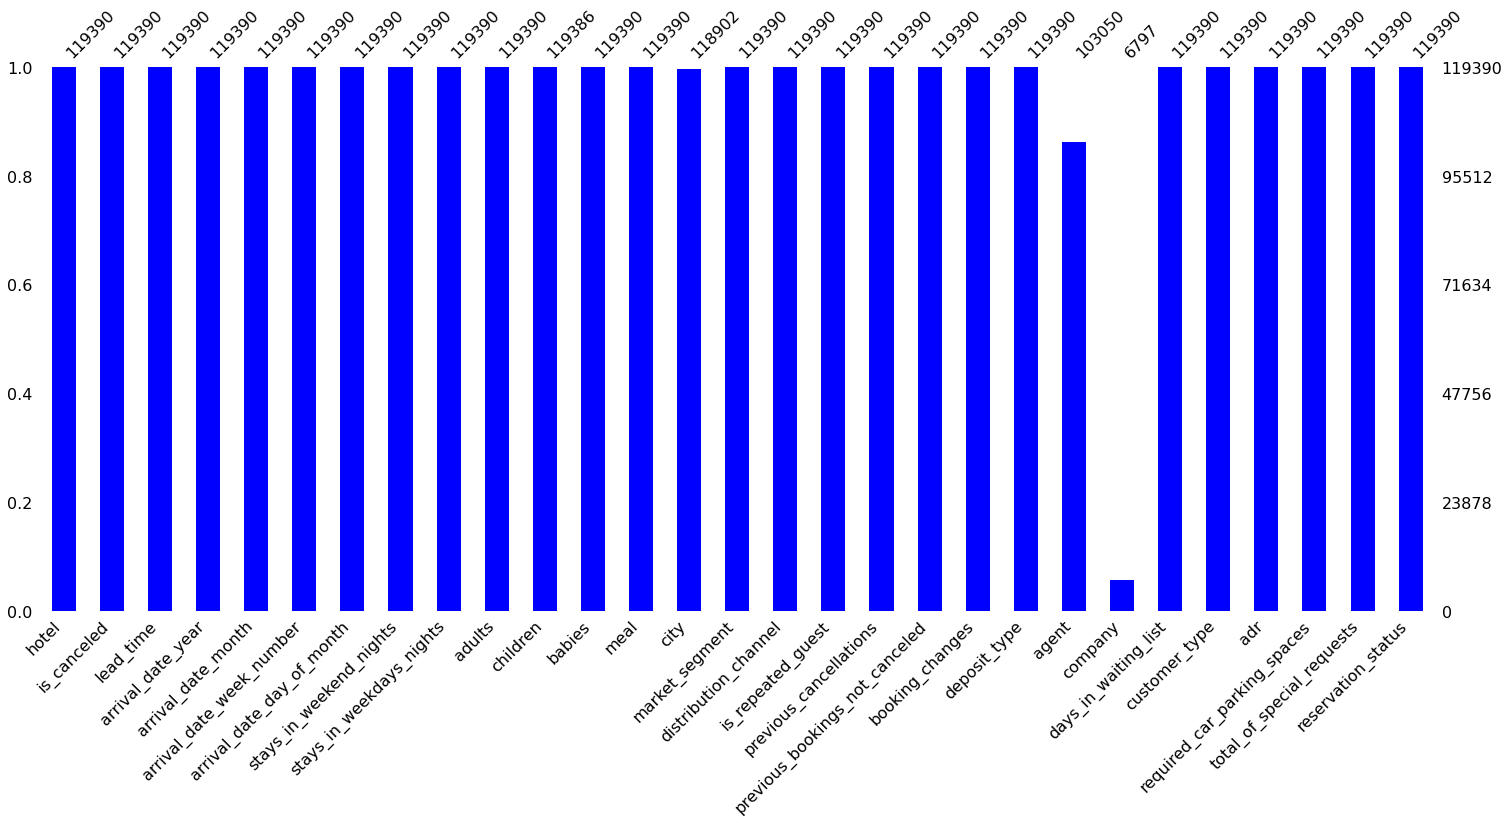

In [ ]:
#missing values plot
import missingno
missingno.bar(df, color = "b")
plt.show()

In [ ]:
#check undefined data

cat_var = df.select_dtypes('object').columns.to_list()
undefined_data = []
for x in cat_var:
    if 'Undefined' in df[x].value_counts().index.to_list():
        undefined_data.append(x)
        
undefined_data

['meal', 'market_segment', 'distribution_channel']

In [ ]:
df[(df.meal=='Undefined') |(df.market_segment=='Undefined') |  (df.distribution_channel == 'Undefined')][undefined_data]

,meal,market_segment,distribution_channel
3106,Undefined,Offline TA/TO,TA/TO
3107,Undefined,Offline TA/TO,TA/TO
3108,Undefined,Offline TA/TO,TA/TO
3110,Undefined,Offline TA/TO,TA/TO
3111,Undefined,Offline TA/TO,TA/TO
...,...,...,...
39962,Undefined,Direct,Direct
40600,Breakfast,Undefined,Undefined
40667,Breakfast,Direct,Undefined
40679,Breakfast,Undefined,Undefined


#### 1.3.1 Analisa Output 

* Missing value pada *company* hampir 95% dengan artian bahwa pihak perusahaan yang memesan hotel hanya 5%.
* Missing value pada *agent* sekitar 13% dengan artian bahwa 87% yang memesan hotel bukan dari pihak biro perjalanan.
* Missing value pada *city* kemungkinan beberapa pemesan tidak mengisi asal kotanya.
* Missing value pada *children* hanya 4 data, kemungkinan pemesan tidak memiliki anak.
* Pada kolom market_segment dan distribution_channel nilai 'undefined' kemungkinan tidak diketahui
* Pada kolom meal nilai 'undefined' bermakna No Meal, kita bisa mereplace nilainya 'Undefined' dengan 'No Meal'
* Maka untuk handle missing value pada *company, agent, dan children* kita dapat mengimputasi dengan nilai 0 dalam keterangan 'tidak' sedangkan untuk *city* kita mengimputasikan dengan 'Unknown'/'Tidak Diketahui'

### 1.4 Examining Duplicate Values

In [ ]:
df[df.duplicated(keep=False)].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
21,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
39,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out


In [ ]:
df.duplicated().sum()

33261

In [ ]:
print('Persentase data duplikat :' , df.duplicated().sum()/df.shape[0])

Persentase data duplikat : 0.27859117178993215


## 2. Data Preprocessing

### 2.1 Handle Missing Value

In [ ]:
# Imputation 0 and cast to int for Numerical, and 'Unknown' for Categorical
df['city'].fillna('Unknown', inplace=True)
df.fillna({'company':0, 'agent': 0, 'children': 0}, downcast='infer', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

### 2.2 Handle Invalid Value

In [ ]:
#Replace undefined to no meal because is same
df['meal'].replace({'Undefined':'No Meal'}, inplace=True)

In [ ]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### 2.3 Drop Unnecessary Data

Hapus data yang tidak memiliki tamu atau yang tidak ditinggali

In [ ]:
df['total_guest'] = df['children'] + df['adults'] + df['babies']
df['stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

In [ ]:
print('Sebelum Drop Data')
print('Jumlah 0 Tamu =', df[df['total_guest'] == 0]['total_guest'].count())
print('Jumlah 0 Tinggal =', df[df['stay_duration'] == 0]['total_guest'].count())
print('Total = ', df.loc[(df['total_guest']==0) | (df['stay_duration']==0)]['is_canceled'].count())

Sebelum Drop Data
Jumlah 0 Tamu = 180
Jumlah 0 Tinggal = 715
Total =  825


In [ ]:
#Drop unnecessary data
df.drop(df.loc[(df['total_guest']==0) | (df['stay_duration']==0)].index, inplace=True, axis=0)

In [ ]:
print('Setelah Drop Data')
print('Jumlah 0 Tamu =', df[df['total_guest'] == 0]['total_guest'].count())
print('Jumlah 0 Tinggal =', df[df['stay_duration'] == 0]['total_guest'].count())
print('Total = ', df.loc[(df['total_guest']==0) | (df['stay_duration']==0)]['is_canceled'].count())

Setelah Drop Data
Jumlah 0 Tamu = 0
Jumlah 0 Tinggal = 0
Total =  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_weekdays_nights        118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

### 2.4 Drop Duplicate Values

In [ ]:
print('Duplicate values sebelum dihapus :', df.duplicated().sum())

Duplicate values sebelum dihapus : 33187


In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
print('Duplicate Values setelah di drop :', df.duplicated().sum())

Duplicate Values setelah di drop : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                           

## 3. Monthly Hotel Booking Analysis Based on Hotel Type

Melihat dan menganalisis pada bulan apa (atau musim apa) terjadi kenaikan dan penurunan dari jumlah pemesanan hotel untuk setiap jenis hotel.

### 3.1 Perbandingan Jumlah Pemesanan Hotel Setiap Bulan Berdasarkan Jenis Hotel

In [ ]:
# Perhatikan data tahun kedatangan
df.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'count','arrival_date_year':'unique'})

is_canceled   arrival_date_year
hotel        arrival_date_month                                 
City Hotel   April                      3514        [2018, 2019]
             August                     4908        [2018, 2019]
             December                   4009        [2017, 2018]
             February                   2952        [2017, 2018]
             January                    2849        [2017, 2018]
             July                       5321        [2018, 2019]
             June                       5017        [2018, 2019]
             March                      2674        [2018, 2019]
             May                        4777        [2018, 2019]
             November                   4040        [2017, 2018]
             October                    6473  [2017, 2018, 2019]
             September                  5657  [2017, 2018, 2019]
Resort Hotel April                      2453        [2018, 2019]
             August                     2705        [2018, 2019]
             December                   2618        [2017, 2018]
             February                   2044        [2017, 2018]
             January                    1995        [2017, 2018]
             July                       2863        [2018, 2019]
             June                       2756        [2018, 2019]
             March                      1904        [2018, 2019]
             May                        2585        [2018, 2019]
             November                   2386        [2017, 2018]
             October                    4615  [2017, 2018, 2019]
             September                  4263  [2017, 2018, 2019]

In [ ]:
# Normalisasi
agg_df = df.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'count','arrival_date_year':'nunique'}).reset_index()
agg_df['total_norm'] = agg_df['is_canceled']/agg_df['arrival_date_year']
agg_df

,hotel,arrival_date_month,is_canceled,arrival_date_year,total_norm
0,City Hotel,April,3514,2,1757.000000
1,City Hotel,August,4908,2,2454.000000
2,City Hotel,December,4009,2,2004.500000
3,City Hotel,February,2952,2,1476.000000
4,City Hotel,January,2849,2,1424.500000
5,City Hotel,July,5321,2,2660.500000
6,City Hotel,June,5017,2,2508.500000
7,City Hotel,March,2674,2,1337.000000
8,City Hotel,May,4777,2,2388.500000
9,City Hotel,November,4040,2,2020.000000


In [ ]:
# Urutkan data berdasarkan bulan 
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

agg_df['hotel'] = agg_df['hotel'].astype('category')
agg_df['arrival_date_month'] = agg_df['arrival_date_month'].astype('category')
agg_df['arrival_date_month'] = agg_df['arrival_date_month'].cat.set_categories(month_list)

#sorting data
agg_df = agg_df.sort_values(['hotel','arrival_date_month'])

In [ ]:
#Menyingkat nama bulan untuk visualisasi
agg_df['month'] = agg_df['arrival_date_month'].apply(lambda x: x[:3])

In [ ]:
agg_df

,hotel,arrival_date_month,is_canceled,arrival_date_year,total_norm,month
4,City Hotel,January,2849,2,1424.500000,Jan
3,City Hotel,February,2952,2,1476.000000,Feb
7,City Hotel,March,2674,2,1337.000000,Mar
0,City Hotel,April,3514,2,1757.000000,Apr
8,City Hotel,May,4777,2,2388.500000,May
6,City Hotel,June,5017,2,2508.500000,Jun
5,City Hotel,July,5321,2,2660.500000,Jul
1,City Hotel,August,4908,2,2454.000000,Aug
11,City Hotel,September,5657,3,1885.666667,Sep
10,City Hotel,October,6473,3,2157.666667,Oct


In [ ]:
#plot kenaikan dan penuruan
#plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')

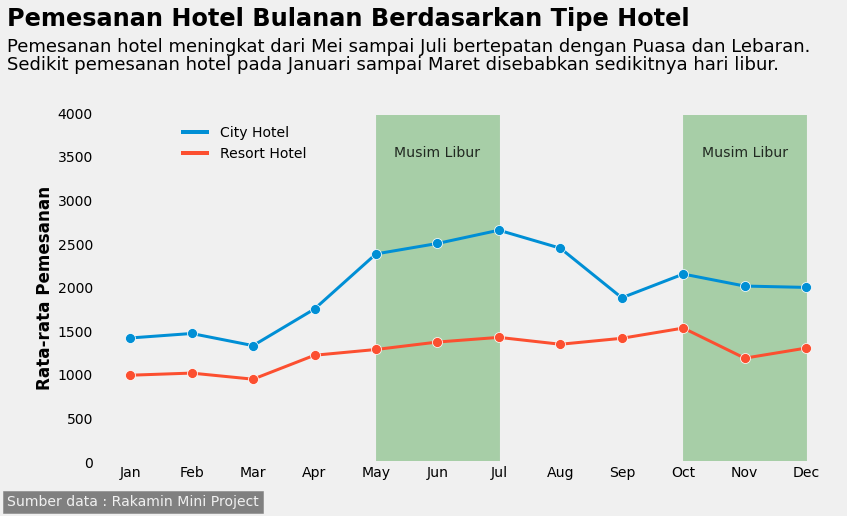

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=agg_df, x="month", y="total_norm", hue='hotel', lw=3, marker='o', markersize=10)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.text(x=-2, y=5000, s='Pemesanan Hotel Bulanan Berdasarkan Tipe Hotel', fontsize=24, fontweight='bold')
plt.text(x=-2, y=4700, s='Pemesanan hotel meningkat dari Mei sampai Juli bertepatan dengan Puasa dan Lebaran.', fontsize=18)
plt.text(x=-2, y=4500, s='Sedikit pemesanan hotel pada Januari sampai Maret disebabkan sedikitnya hari libur.', fontsize=18)
plt.axvspan(4, 6, color='green', alpha=0.3)
plt.text(4.3, 3500, s='Musim Libur', alpha=0.8)
plt.axvspan(9, 11, color='green', alpha=0.3)
plt.text(9.3, 3500, s='Musim Libur', alpha=0.8)
plt.legend(frameon=False, bbox_to_anchor=(0.3, 1))
plt.grid(False)
plt.text(x=-2, y = -500,
    s = 'Sumber data : Rakamin Mini Project',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.xlabel(None)
plt.ylabel('Rata-rata Pemesanan', weight='bold')
plt.ylim(0,4000)
plt.tight_layout()
plt.show()

### 3.3 Kalender 2018 dan 2019

<img src='https://nirwanadigitalprint.files.wordpress.com/2017/09/d0151-kalender2b20182bver2b2.png' alt='Kalender 2019'>
<img src='https://1.bp.blogspot.com/-9IzmrbZSWdA/XWq9akGSxgI/AAAAAAAACD8/F6Ep1RtKwGI09s3XkpmHseWhEvQed95TwCLcBGAs/s1600/kalender_tahun_2019.jpg' alt='Kalender 2019'>

### 3.3 Interpretasi
* Sekilas terlihat pelanggan lebih banyak memilih memesan hotel perkotaan dibandingkan dengan hotel resort.
* Musim libur paling lama diindonesia ialah cuti lebaran dan cuti tahun baru.
* Pemesanan hotel bertambah pada libur yang memiliki cuti bersama, terbukti dengan meningkatnya pemesanan antara mei sampai juli yang merupakan libur puasa dan lebaran.
* kedua jenis hotel dari januari sampai agustus memiliki pola kenaikan yang sama, namun hotel resort mengalami kenaikan di bulan september, sedangkan hotel perkotaan mengalami sebaliknya. adapun hari libur pada bulan september hanya tahun baru hijriah.
* pemesanan hotel pada libur lebaran lebih tinggi daripada libur tahun baru, kemungkinan karena penduduk indonesia mayoritas muslim.
* pada bulan januari hingga maret sedikit yang memesan hotel kemungkinan sudah mulai sibuk bekerja.


## 4. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

Menganalisis bagaimana korelasi antara durasi menginap terhadap tingkat pembatalan pemesanan hotel

### 4.1 Check distribusi kolom stay_duration

In [ ]:
# total durasi menginap
# ambil kolom hasil penambahan dari kolom stay

df['stay_duration'].value_counts()

3     17527
1     16908
2     15332
4     13382
7      7464
5      6698
6      3249
10     1071
8      1059
14      857
9       778
11      366
12      196
13      132
15       69
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
26        6
24        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
46        1
45        1
38        1
48        1
34        1
Name: stay_duration, dtype: int64

In [ ]:
print('Skewness pada kolom stay_duration : ', df.stay_duration.skew())

Skewness pada kolom stay_duration :  2.9619604541903986


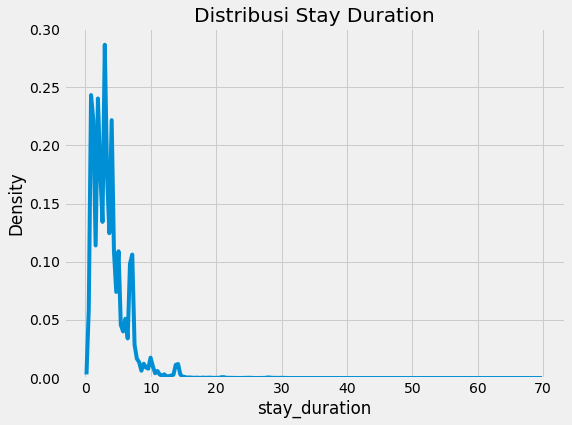

In [ ]:
# cek sebaran data kolom stay duration
plt.figure(figsize=(8,6))
plt.title('Distribusi Stay Duration')
sns.kdeplot(df['stay_duration'])
plt.show()

### 4.2 Analisa Output



* Berdasarkan skewness terlihat bahwa kolom distribusi miring ke kanan atau dengan kata lain right skewness
* Dilihat dari plot diatas terdapat pemesanan lebih dari 15 hari kemungkinan ini adalah outliers atau kasus khusus(?)
* dilihat dari jumlah penginapan, diatas dari 15 hari rata-rata dibawah 20 hari.Untuk lebih memudahkan kita dapat melakukan pengelompokan data pada nilai tersebut.


In [ ]:
print('Terdapat {} data lebih dari > 20 hari'.format(df.stay_duration.between(15,df.stay_duration.max(), inclusive='right').sum()))

Terdapat 290 data lebih dari > 20 hari


## 4.3 Mengelompokkan data > 20 hari pada kolom stay_duration

In [ ]:
#mengelompokkan data > 20 hari
df['group_stay_day'] = df['stay_duration'].apply(lambda x: ">15" if x > 15 else x)

In [ ]:
df['group_stay_day'].value_counts()

3      17527
1      16908
2      15332
4      13382
7       7464
5       6698
6       3249
10      1071
8       1059
14       857
9        778
11       366
>15      290
12       196
13       132
15        69
Name: group_stay_day, dtype: int64

### 4.4 Perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [ ]:
#ambil kolom untuk diagregasi
booking_duration = ['is_canceled', 'group_stay_day', 'hotel']

In [ ]:
#aggregasi kolom
canceled_df = df.pivot_table(index=['hotel','group_stay_day'], values='arrival_date_month', columns='is_canceled', aggfunc='count').reset_index()

In [ ]:
canceled_df.columns

Index(['hotel', 'group_stay_day', 0, 1], dtype='object', name='is_canceled')

In [ ]:
#persentase pembatalan
canceled_df.rename(columns={0:'not_canceled',1:'canceled'}, inplace=True)
canceled_df['canceled_pct'] = (cancelled_df['canceled']/(cancelled_df['canceled']+cancelled_df['not_canceled'])*100)
canceled_df

is_canceled,hotel,group_stay_day,not_canceled,canceled,canceled_pct
0,City Hotel,1,7841,2259,22.366337
1,City Hotel,2,7374,3133,29.818216
2,City Hotel,3,9136,4182,31.401111
3,City Hotel,4,6440,3059,32.203390
4,City Hotel,5,2887,1257,30.333012
5,City Hotel,6,1022,610,37.377451
6,City Hotel,7,1145,692,37.670114
7,City Hotel,8,195,166,45.983380
8,City Hotel,9,111,87,43.939394
9,City Hotel,10,78,110,58.510638


In [ ]:
cancel_df = cancelled_df.pivot(index="group_stay_day", columns="hotel", values="canceled_pct")

In [ ]:
print('Rata-rata persentase pembatalan hotel :')
cancel_df.mean()

Rata-rata persentase pembatalan hotel :


hotel
City Hotel      47.274395
Resort Hotel    27.307284
dtype: float64

In [ ]:
pd.Series(cancel_df['City Hotel']) - pd.Series(cancel_df['City Hotel']).shift(-1)

group_stay_day
1      -7.451880
2      -1.582895
3      -0.802279
4       1.870378
5      -7.044439
6      -0.292663
7      -8.313265
8       2.043986
9     -14.571244
10     -0.699888
11     10.934664
12    -14.224138
13     -7.954545
14      5.589681
15    -16.616617
>15          NaN
Name: City Hotel, dtype: float64

In [ ]:
pd.Series(cancel_df['City Hotel']).shift(-1)

group_stay_day
1      29.818216
2      31.401111
3      32.203390
4      30.333012
5      37.377451
6      37.670114
7      45.983380
8      43.939394
9      58.510638
10     59.210526
11     48.275862
12     62.500000
13     70.454545
14     64.864865
15     81.481481
>15          NaN
Name: City Hotel, dtype: float64

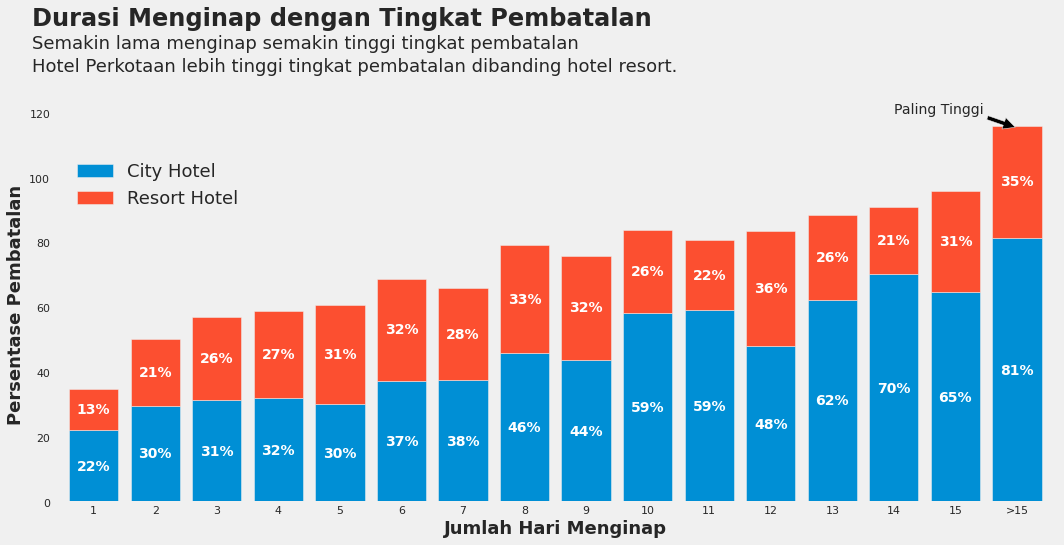

In [ ]:
#plot
ax = cancel_df.plot(kind='bar', stacked=True, figsize=(15,8), width=0.8)

ax.annotate('Paling Tinggi', xy=(15, 115.5), xytext=(13, 120),
            arrowprops=dict(facecolor='black', shrink=0.05))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', color='white', weight='bold')

plt.text(x=-1, y=147, s='Durasi Menginap dengan Tingkat Pembatalan', fontsize=24, fontweight='bold')
plt.text(x=-1, y=140, s='Semakin lama menginap semakin tinggi tingkat pembatalan', fontsize=18)
plt.text(x=-1, y=133, s='Hotel Perkotaan lebih tinggi tingkat pembatalan dibanding hotel resort.', fontsize=18)

plt.legend(frameon=False, bbox_to_anchor=(0.2,0.9), fontsize = 18)

plt.grid(False)

plt.ylabel('Persentase Pembatalan', fontsize=18, weight='bold')
plt.xlabel('Jumlah Hari Menginap', fontsize=18, weight='bold')

plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

### 4.5 Interpretasi

* Dilihat dari grafik tingkat pembatalan hotel perkotaan lebih tinggi dari hotel resort.
* Semakin lama hari menginap semakin tinggi tingkat pembatalan.
* Tingkat pembatalan paling tinggi pada kedua jenis hotel lebih dari 15 hari.
* Oleh sebab itu sebaiknya pihak hotel memberikan aturan tegas seperti pemotongan biaya sebagai biaya pembatalan.

## 5. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

Menganalisis bagaimana korelasi antara jarak waktu pemesanan hotel(lead_time) terhadap tingkat pembatalan pemesanan hotel

### 5.1 Check distribusi kolom lead_time

In [ ]:
df['lead_time'].value_counts()

0      5633
1      3130
2      1891
3      1683
4      1538
       ... 
410       1
605       1
400       1
626       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [ ]:
df['lead_time'].describe()

count    85378.000000
mean        79.647567
std         85.517499
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        709.000000
Name: lead_time, dtype: float64

In [ ]:
print('Skewness pada kolom lead_time : ', df.lead_time.skew())

Skewness pada kolom lead_time :  1.4274959226301107


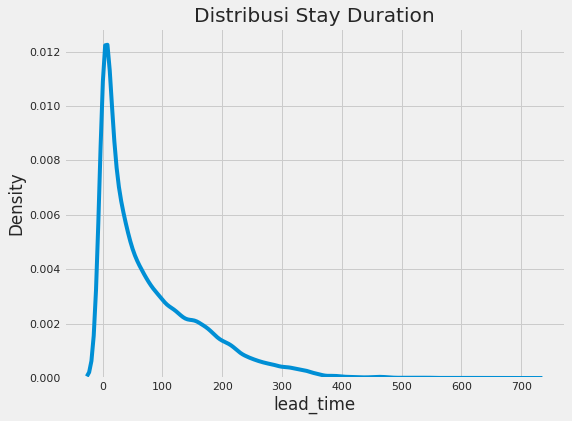

In [ ]:
# cek sebaran data kolom lead time
plt.figure(figsize=(8,6))
plt.title('Distribusi Stay Duration')
sns.kdeplot(df['lead_time'])
plt.show()

### 5.2 Analisa Output



* Berdasarkan skewness terlihat bahwa kolom distribusi miring ke kanan atau dengan kata lain right skewness
* Dilihat dari plot diatas terdapat waktu pemesanan lebih dari 365 hari kemungkinan ini adalah outliers atau kasus khusus(?)
* Untuk lebih memudahkan kita dapat melakukan pengelompokan data pada nilai tersebut per kuartal.


### 5.3 Mengelompokkan Lead_Time per 30 hari

In [ ]:
def binning_lead_time(x):
  if x <= 30:
    label = '1 Bulan'
  elif x > 30 and x <= 90:
    label = '2-3 Bulan'
  elif x > 90 and x <= 180:
    label = '4-6 Bulan'
  elif x > 180 and x <= 270:
    label = '7-9 Bulan'
  elif x > 270 and x <= 360:
    label ='10-12 Bulan'
  else:
    label = '> 1 Tahun'

  return label  

In [ ]:
df['lead_time_by_month'] = df['lead_time'].apply(lambda x:binning_lead_time(x))

In [ ]:
df['lead_time_by_month'].value_counts()

1 Bulan        33810
2-3 Bulan      22285
4-6 Bulan      17919
7-9 Bulan       7973
10-12 Bulan     2776
> 1 Tahun        615
Name: lead_time_by_month, dtype: int64

In [ ]:
#pivot table
leadtime_df = df.pivot_table(index=['hotel','lead_time_by_month'], values='arrival_date_month', columns='is_canceled', aggfunc='count').rename(columns={0:'not_canceled', 1:'canceled'}).reset_index()
leadtime_df

is_canceled,hotel,lead_time_by_month,not_canceled,canceled
0,City Hotel,1 Bulan,16024,3927
1,City Hotel,10-12 Bulan,594,744
2,City Hotel,2-3 Bulan,9887,4972
3,City Hotel,4-6 Bulan,7170,4166
4,City Hotel,7-9 Bulan,2517,1819
5,City Hotel,> 1 Tahun,172,199
6,Resort Hotel,1 Bulan,12169,1690
7,Resort Hotel,10-12 Bulan,885,553
8,Resort Hotel,2-3 Bulan,5206,2220
9,Resort Hotel,4-6 Bulan,4460,2123


In [ ]:
list_group_by_month = df['lead_time_by_month'].value_counts().index.to_list()

In [ ]:
leadtime_df['lead_time_by_month'] = leadtime_df['lead_time_by_month'].astype('category')
leadtime_df['lead_time_by_month'] = leadtime_df['lead_time_by_month'].cat.set_categories(list_group_by_month)

In [ ]:
# menghitung persentase pembatalan

leadtime_df['canceled_pct'] = (leadtime_df['canceled']/(leadtime_df['canceled']+leadtime_df['not_canceled']))*100 
leadtime_df

is_canceled,hotel,lead_time_by_month,not_canceled,canceled,canceled_pct
0,City Hotel,1 Bulan,16024,3927,19.683224
1,City Hotel,10-12 Bulan,594,744,55.605381
2,City Hotel,2-3 Bulan,9887,4972,33.461202
3,City Hotel,4-6 Bulan,7170,4166,36.750176
4,City Hotel,7-9 Bulan,2517,1819,41.951107
5,City Hotel,> 1 Tahun,172,199,53.638814
6,Resort Hotel,1 Bulan,12169,1690,12.194242
7,Resort Hotel,10-12 Bulan,885,553,38.456189
8,Resort Hotel,2-3 Bulan,5206,2220,29.894964
9,Resort Hotel,4-6 Bulan,4460,2123,32.249734


In [ ]:
leadtime_df.groupby('hotel')['canceled_pct'].mean()

hotel
City Hotel      40.181651
Resort Hotel    27.423268
Name: canceled_pct, dtype: float64

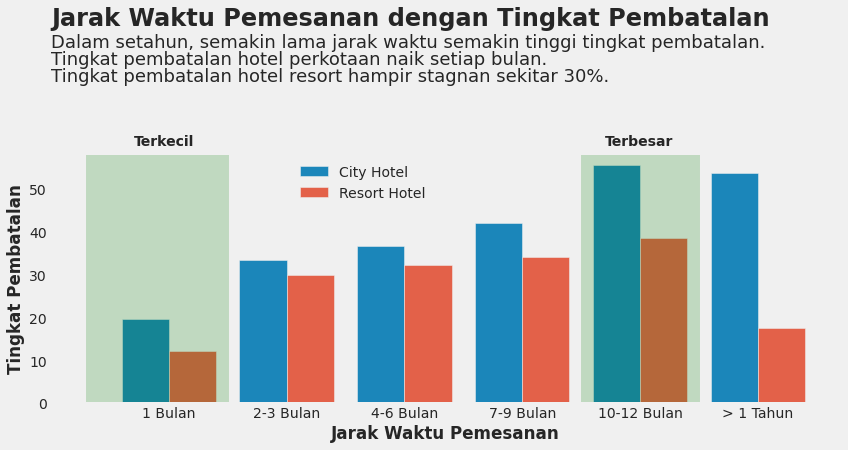

In [ ]:
move=10

plt.figure(figsize=(12,8))
sns.barplot(data=leadtime_df.sort_values(['hotel','lead_time_by_month']), x="lead_time_by_month", y="canceled_pct", hue='hotel')
plt.text(x=-1, y=78+move, s='Jarak Waktu Pemesanan dengan Tingkat Pembatalan', fontsize=24, fontweight='bold')
plt.text(x=-1, y=73+move, s='Dalam setahun, semakin lama jarak waktu semakin tinggi tingkat pembatalan.', fontsize=18)
plt.text(x=-1, y=69+move, s='Tingkat pembatalan hotel perkotaan naik setiap bulan.', fontsize=18)
plt.text(x=-1, y=65+move, s='Tingkat pembatalan hotel resort hampir stagnan sekitar 30%.', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.grid(False)
plt.legend(frameon=False, bbox_to_anchor=(0.3, 1), fontsize= 14)
plt.axvspan(-0.7,0.5, color='green', alpha=0.2)
plt.text(x=-0.3, y=60, s='Terkecil', weight='bold')
plt.axvspan(3.5,4.5, color='green', alpha=0.2, )
plt.text(x=3.7, y=60, s='Terbesar',  weight='bold')
plt.xlabel('Jarak Waktu Pemesanan', weight='bold')
plt.ylabel('Tingkat Pembatalan', weight='bold')
plt.tight_layout()
plt.show()

### 5.4 Interpretasi

* Sekilas terlihat tingkat pembatalan pada hotel perkotaan lebih tinggi daripada hotel resort.
* Dalam setahun, semakin lama jarak waktu pemesanan semakin tinggi tingkat pembatalannya.
* Tingkat pembatalan hotel perkotaan naik setiap bulan.
* Tingkat pembatalan hotel resort hampir stagnan sekitar 30%.
* Tingkat pembatalan hotel paling kecil berada dalam satu bulan waktu pemesanan.
* Tingkat pembatalan hotel paling tinggi berada dalam 10-12 bulan pemesanan.
* Dilihat dari data, maka sebaiknya pihak hotel membatasi jarak waktu pemesanan yang dibolehkan, misalnya tidak boleh lebih dari 30 hari.
